In [2]:
import pandas as pd
import glob
import numpy as np

path = r'C:\Users\xaa2cng\Documents\tension\Tension_20200623' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame.shape

(310932, 8)

In [115]:
310932/6200

50.15032258064516

In [6]:
frame.head()

Unnamed: 0  productNo                 readtime  signal  tensionLeft  \
0           0      41470  2020-06-23 09:17:45:388       1      8.12073   
1           1      41470  2020-06-23 09:17:45:388       1      8.13416   
2           2      41470  2020-06-23 09:17:45:388       1      8.24574   
3           3      41470  2020-06-23 09:17:45:388       1      8.65932   
4           4      41470  2020-06-23 09:17:45:404       1      9.34770   

   tensionRight  voltageLeft  voltageRight  
0       7.38438      0.13813       0.15542  
1       7.41905      0.13879       0.15659  
2       7.70312      0.13899       0.15683  
3       8.39210      0.13886       0.15652  
4       9.14493      0.13896       0.15682

In [4]:
my_tab = pd.crosstab(index=frame["productNo"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0      count
productNo       
41470       6078
41478       6070
41481      34852
41483       6076
41488       6075
41489       6076
41490       6070
41492      12327
41495       6171
41503       6157
41507       6280
41508       6207
41510       6126
41513      12258
41521       6130
41522       6137
41523      24532
41524      18407
41525      30682
41526       6128
41527       6154
41528      55243
41529      12281
41530       6139
41532       6139
41534       6137

In [11]:
my_tab.shape

(26, 1)

In [12]:
sum(my_tab['count']>10000)

8

In [14]:
sum(my_tab['count']<6300)

18

In [24]:
my_tab.iloc[:,0].index

Int64Index([41470, 41478, 41481, 41483, 41488, 41489, 41490, 41492, 41495,
            41503, 41507, 41508, 41510, 41513, 41521, 41522, 41523, 41524,
            41525, 41526, 41527, 41528, 41529, 41530, 41532, 41534],
           dtype='int64', name='productNo')

In [28]:
productid=my_tab.index[0]

In [31]:
subframe=frame[frame['productNo']==productid]

In [35]:
import matplotlib.pyplot as plt 
plt.plot(subframe['tensionLeft'])
plt.plot(subframe['tensionRight'])
plt.plot(subframe['voltageLeft'])
plt.plot(subframe['voltageRight'])
plt.legend(['tensionLeft', 'tensionRight', 'voltageLeft', 'voltageRight'], loc='upper left')
plt.show()

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig.suptitle('Axes values are scaled individually by default')
ax1.plot(['tensionLeft'])
ax2.plot(subframe['tensionRight'])
ax3.plot(subframe['voltageLeft'])
ax4.plot(subframe['voltageRight'])

In [41]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(subframe['tensionLeft'])
axs[0, 0].set_title('tensionLeft')
axs[0, 1].plot(subframe['tensionRight'])
axs[0, 1].set_title('tensionRight')
axs[1, 0].plot(subframe['voltageLeft'])
axs[1, 0].set_title('voltageLeft')
axs[1, 1].plot(subframe['voltageRight'])
axs[1, 1].set_title('voltageRight')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [68]:
for i in range(26):
    productid=my_tab.index[i]
    subframe=frame[frame['productNo']==productid]
    plt.figure()
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
    fig.suptitle('Variables change through product ID '+str(productid))
    ax1.plot(np.arange(subframe.shape[0])+1,subframe['tensionLeft'])
    ax2.plot(np.arange(subframe.shape[0])+1,subframe['tensionRight'])
    ax3.plot(np.arange(subframe.shape[0])+1,subframe['voltageLeft'])
    ax4.plot(np.arange(subframe.shape[0])+1,subframe['voltageRight'])
    #plt.xlabel('Time(ms)')
    #plt.ylabel('EMG voltage(microV)')
    plt.savefig('Tension {0}.jpg'.format(productid))
    plt.close()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

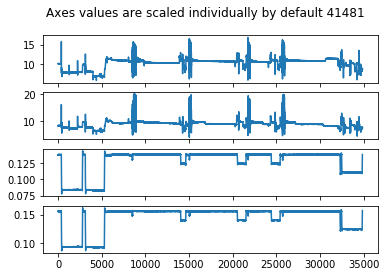

In [65]:
i=2
productid=my_tab.index[i]
subframe=frame[frame['productNo']==productid]
plt.figure()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig.suptitle('Axes values are scaled individually by default '+str(productid))
ax1.plot(np.arange(subframe.shape[0])+1,subframe['tensionLeft'])
ax2.plot(np.arange(subframe.shape[0])+1,subframe['tensionRight'])
ax3.plot(np.arange(subframe.shape[0])+1,subframe['voltageLeft'])
ax4.plot(np.arange(subframe.shape[0])+1,subframe['voltageRight'])
plt.show()

In [5]:
my_tab2=my_tab[my_tab['count']<6300]

In [71]:
my_tab2.size

18

In [74]:
for i in range(18):
    productid=my_tab2.index[i]
    subframe=frame[frame['productNo']==productid]
    plt.figure()
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
    fig.suptitle('Variables change through product ID '+str(productid))
    ax1.plot(np.arange(subframe.shape[0])+1,subframe['tensionLeft'])
    ax2.plot(np.arange(subframe.shape[0])+1,subframe['tensionRight'])
    ax3.plot(np.arange(subframe.shape[0])+1,subframe['voltageLeft'])
    ax4.plot(np.arange(subframe.shape[0])+1,subframe['voltageRight'])
    #plt.xlabel('Time(ms)')
    #plt.ylabel('EMG voltage(microV)')
    plt.savefig('Tension {0}.jpg'.format(productid))
    plt.close()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [85]:
    i=1
    productid=my_tab2.index[i]
    subframe=frame[frame['productNo']==productid]
    subframe.drop(['Unnamed: 0','signal'],axis=1,inplace=True)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [86]:
statframe=subframe.describe()

In [87]:
statframe

productNo  tensionLeft  tensionRight  voltageLeft  voltageRight
count     6070.0  6070.000000   6070.000000  6070.000000   6070.000000
mean     41478.0     9.894549      9.836548     0.120219      0.135463
std          0.0     2.000005      2.412962     0.020043      0.023114
min      41478.0     5.615650      4.361340     0.077740      0.086570
25%      41478.0     8.169960      8.385872     0.110420      0.124200
50%      41478.0     9.958555      9.672595     0.125130      0.141030
75%      41478.0    11.298810     11.095310     0.137960      0.155750
max      41478.0    16.930080     19.621200     0.144490      0.162700

In [64]:
li = []

for i in range(18):
    productid=my_tab2.index[i]
    subframe=frame[frame['productNo']==productid]
    subframe.drop(['Unnamed: 0','signal'],axis=1,inplace=True)
    statframe=subframe.describe()
    li.append(statframe)

statframetotal = pd.concat(li, axis=0, ignore_index=False)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [65]:
statframetotal.loc['mean'] 

productNo  tensionLeft  tensionRight  voltageLeft  voltageRight
mean    41470.0     9.825874      9.767522     0.120196      0.135465
mean    41478.0     9.894549      9.836548     0.120219      0.135463
mean    41483.0     9.874737      9.647107     0.120295      0.135542
mean    41488.0     9.869526     10.160863     0.120260      0.135494
mean    41489.0     9.827919     10.413313     0.120217      0.135467
mean    41490.0     9.735319     10.178791     0.120246      0.135529
mean    41495.0     9.741724     10.395012     0.120278      0.135557
mean    41503.0     9.889731     10.269982     0.120210      0.135501
mean    41507.0     9.909862     10.367859     0.120571      0.135916
mean    41508.0     9.875580     10.149720     0.120487      0.135761
mean    41510.0     9.882581     10.195046     0.120184      0.135465
mean    41521.0     9.707395     10.328496     0.120152      0.135397
mean    41522.0     9.755646     10.337996     0.120103      0.135360
mean    41526.0     9.856377     10.229422     0.120214      0.135446
mean    41527.0     9.742680     10.091170     0.120124      0.135383
mean    41530.0     9.899472     10.084499     0.120219      0.135478
mean    41532.0     9.796593      9.990524     0.120278      0.135558
mean    41534.0     9.775287     10.092500     0.120155      0.135423

In [98]:
dfmin=statframetotal.loc['min'] 

productNo  tensionLeft  tensionRight  voltageLeft  voltageRight
min    41470.0      5.07547       4.63588      0.07750       0.08679
min    41478.0      5.61565       4.36134      0.07774       0.08657
min    41483.0      5.60344       4.42811      0.07780       0.08681
min    41488.0      5.48991       5.05106      0.07755       0.08618
min    41489.0      5.38090       4.90799      0.07759       0.08692
min    41490.0      5.35356       4.47853      0.07785       0.08692
min    41495.0      5.26066       5.08206      0.07758       0.08662
min    41503.0      5.65166       4.90896      0.07765       0.08651
min    41507.0      5.58953       4.84854      0.07759       0.08661
min    41508.0      5.48283       5.05008      0.07768       0.08676
min    41510.0      5.41752       4.79189      0.07767       0.08657
min    41521.0      5.24345       5.10221      0.07768       0.08653
min    41522.0      5.20768       5.05228      0.07781       0.08684
min    41526.0      5.50615       5.03751      0.07794       0.08694
min    41527.0      5.17411       4.84561      0.07736       0.08676
min    41530.0      5.42326       4.97305      0.07786       0.08700
min    41532.0      5.48210       5.09488      0.07773       0.08685
min    41534.0      5.11893       4.86331      0.07674       0.08680

In [66]:
li

[       productNo  tensionLeft  tensionRight  voltageLeft  voltageRight
 count     6078.0  6078.000000   6078.000000  6078.000000   6078.000000
 mean     41470.0     9.825874      9.767522     0.120196      0.135465
 std          0.0     2.148951      2.394245     0.020078      0.023143
 min      41470.0     5.075470      4.635880     0.077500      0.086790
 25%      41470.0     8.212775      8.350780     0.110500      0.124310
 50%      41470.0     9.904480      9.621390     0.125110      0.140980
 75%      41470.0    11.347787     10.954432     0.137960      0.155800
 max      41470.0    16.879540     19.995730     0.144480      0.162650,
        productNo  tensionLeft  tensionRight  voltageLeft  voltageRight
 count     6070.0  6070.000000   6070.000000  6070.000000   6070.000000
 mean     41478.0     9.894549      9.836548     0.120219      0.135463
 std          0.0     2.000005      2.412962     0.020043      0.023114
 min      41478.0     5.615650      4.361340     0.077740      

In [101]:
dfmax=statframetotal.loc['max'] 

productNo  tensionLeft  tensionRight  voltageLeft  voltageRight
max    41470.0     16.87954      19.99573      0.14448       0.16265
max    41478.0     16.93008      19.62120      0.14449       0.16270
max    41483.0     16.37355      20.00000      0.14445       0.16272
max    41488.0     17.02188      20.00000      0.14433       0.16270
max    41489.0     16.94961      19.58544      0.14430       0.16262
max    41490.0     16.90847      19.99097      0.14410       0.16266
max    41495.0     16.24390      19.79003      0.14422       0.16286
max    41503.0     16.38514      19.76415      0.14453       0.16271
max    41507.0     16.60329      19.61571      0.14432       0.16282
max    41508.0     16.26209      19.52562      0.14458       0.16266
max    41510.0     16.84536      19.54686      0.14452       0.16268
max    41521.0     16.52834      19.69250      0.14430       0.16269
max    41522.0     16.32972      19.23179      0.14452       0.16289
max    41526.0     16.24464      19.60448      0.14441       0.16282
max    41527.0     16.48488      19.56908      0.14441       0.16291
max    41530.0     16.41444      19.61608      0.14451       0.16285
max    41532.0     16.59194      19.58043      0.14451       0.16293
max    41534.0     16.48390      19.59154      0.14454       0.16301

In [105]:
dfmin=statframetotal.loc['min'].reset_index()

In [106]:
dfmax=statframetotal.loc['max'].reset_index()

In [113]:
dfmean=statframetotal.loc['mean'].reset_index()

In [112]:
dfmax.iloc[:,2:6]-dfmin.iloc[:,2:6]

tensionLeft  tensionRight  voltageLeft  voltageRight
0      11.80407      15.35985      0.06698       0.07586
1      11.31443      15.25986      0.06675       0.07613
2      10.77011      15.57189      0.06665       0.07591
3      11.53197      14.94894      0.06678       0.07652
4      11.56871      14.67745      0.06671       0.07570
5      11.55491      15.51244      0.06625       0.07574
6      10.98324      14.70797      0.06664       0.07624
7      10.73348      14.85519      0.06688       0.07620
8      11.01376      14.76717      0.06673       0.07621
9      10.77926      14.47554      0.06690       0.07590
10     11.42784      14.75497      0.06685       0.07611
11     11.28489      14.59029      0.06662       0.07616
12     11.12204      14.17951      0.06671       0.07605
13     10.73849      14.56697      0.06647       0.07588
14     11.31077      14.72347      0.06705       0.07615
15     10.99118      14.64303      0.06665       0.07585
16     11.10984      14.48555      0.06678       0.07608
17     11.36497      14.72823      0.06780       0.07621

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
i=1
productid=my_tab2.index[i]
subframe=frame[frame['productNo']==productid]
subframe.drop(['Unnamed: 0','signal','productNo'],axis=1,inplace=True)
corr=subframe.corr()


In [20]:
corr

tensionLeft  tensionRight  voltageLeft  voltageRight
tensionLeft      1.000000      0.928475     0.754472      0.753620
tensionRight     0.928475      1.000000     0.684900      0.683840
voltageLeft      0.754472      0.684900     1.000000      0.999614
voltageRight     0.753620      0.683840     0.999614      1.000000

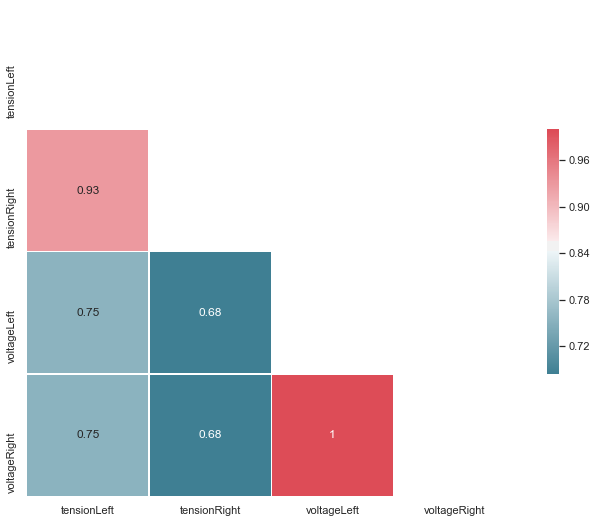

In [22]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.85,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)

In [37]:
for i in range(18):
    productid=my_tab2.index[i]
    subframe=frame[frame['productNo']==productid]
    subframe.drop(['Unnamed: 0','signal','productNo'],axis=1,inplace=True)
    corr=subframe.corr()
    sns.set(style="white")
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    f.suptitle('Correlation coefficient of product ID '+str(productid))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.85,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)
    #plt.xlabel('Time(ms)')
    #plt.ylabel('EMG voltage(microV)')
    plt.savefig('Correlation {0}.jpg'.format(productid))
    plt.close()

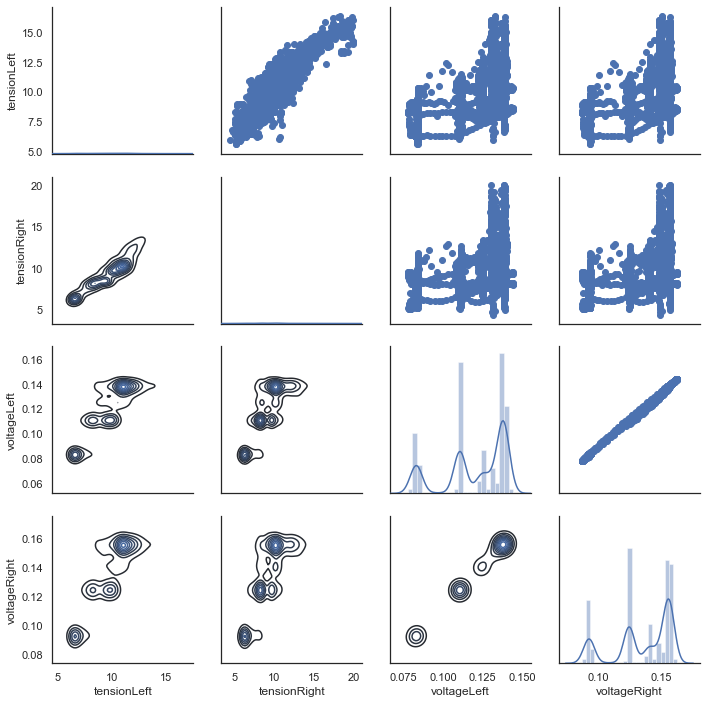

In [28]:
i=2
productid=my_tab2.index[i]
subframe=frame[frame['productNo']==productid]
subframe.drop(['Unnamed: 0','signal','productNo'],axis=1,inplace=True)
g = sns.PairGrid(subframe)
g.map_diag(sns.distplot,norm_hist=False)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [26]:
sns.distplot(subframe['tensionRight'])

In [41]:
for i in range(18):
    productid=my_tab2.index[i]
    subframe=frame[frame['productNo']==productid]
    subframe.drop(['Unnamed: 0','signal','productNo'],axis=1,inplace=True)
    #f, ax = plt.subplots(figsize=(11, 9))
    #f.suptitle('Scatterplot of product ID '+str(productid))
    g = sns.PairGrid(subframe)
    g.map_diag(plt.hist, edgecolor="w")
    g.map_upper(plt.scatter)
    g.map_lower(sns.kdeplot)
    #g.title('Scatterplot of product ID '+str(productid))
    #plt.xlabel('Time(ms)')
    #plt.ylabel('EMG voltage(microV)')
    g.fig.suptitle('Scatterplot of product ID '+str(productid))
    plt.savefig('Scatterplot {0}.jpg'.format(productid))
    plt.close()

In [50]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
i=2
productid=my_tab2.index[i]
subframe=frame[frame['productNo']==productid]
subframe.drop(['Unnamed: 0','signal','productNo'],axis=1,inplace=True)
X = subframe['voltageLeft'].values.reshape((-1, 1))
y = subframe['voltageRight'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

#r_sq = regressor.score(X_train, y_train)
#print('coefficient of determination:', r_sq)

intercept: -0.0030667712994549012
slope: [1.15223225]
coefficient of determination: 0.9992315511096315


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [51]:
# Define a dictionary containing employee data
data = {'Intercept':regressor.intercept_,
        'Slope':regressor.coef_}
 
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data)

In [52]:
df

Intercept     Slope
0  -0.003067  1.152232

In [78]:
dfreg =  pd.DataFrame(columns=['Intercept', 'Slope'])
for i in range(18):
    productid=my_tab2.index[i]
    subframe=frame[frame['productNo']==productid]
    subframe.drop(['Unnamed: 0','signal','productNo'],axis=1,inplace=True)
    X = subframe['voltageLeft'].values.reshape((-1, 1))
    y = subframe['voltageRight'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    #coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
    #coeff_df
    #print('intercept:', regressor.intercept_)
    #print('slope:', regressor.coef_)
    
    # Convert the dictionary into DataFrame 
    #df = pd.DataFrame(data)
   # li.append(df)
    #regtotal = pd.concat(df, axis=0, ignore_index=False)
    dfreg.loc[i]=[regressor.intercept_,regressor.coef_[0]]

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarn

In [79]:
dfreg

Intercept     Slope
0   -0.003009  1.152034
1   -0.003109  1.152671
2   -0.003067  1.152232
3   -0.003067  1.152203
4   -0.002969  1.151547
5   -0.003068  1.152608
6   -0.003140  1.153136
7   -0.003094  1.152961
8   -0.003107  1.153058
9   -0.003266  1.153917
10  -0.003153  1.153395
11  -0.003090  1.152637
12  -0.003084  1.152716
13  -0.003192  1.153302
14  -0.003202  1.153659
15  -0.003206  1.153625
16  -0.003159  1.153327
17  -0.003346  1.154947

In [80]:
dfreg2 =  pd.DataFrame(columns=['Intercept', 'Slope'])
for i in range(18):
    productid=my_tab2.index[i]
    subframe=frame[frame['productNo']==productid]
    subframe.drop(['Unnamed: 0','signal','productNo'],axis=1,inplace=True)
    X = subframe['tensionLeft'].values.reshape((-1, 1))
    y = subframe['tensionRight'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    #coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
    #coeff_df
    #print('intercept:', regressor.intercept_)
    #print('slope:', regressor.coef_)
    
    # Convert the dictionary into DataFrame 
    #df = pd.DataFrame(data)
   # li.append(df)
    #regtotal = pd.concat(df, axis=0, ignore_index=False)
    dfreg2.loc[i]=[regressor.intercept_,regressor.coef_[0]]

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarn

In [81]:
dfreg2

Intercept     Slope
0   -0.259143  1.021128
1   -1.231101  1.119103
2   -1.105328  1.089811
3   -0.472209  1.077028
4   -0.086410  1.068869
5   -0.324066  1.079231
6    0.199238  1.046641
7   -0.330294  1.072252
8   -0.550039  1.101505
9   -0.648366  1.093448
10  -0.287506  1.060717
11  -0.150933  1.080403
12   0.349032  1.023436
13  -0.324983  1.071112
14  -0.313181  1.068484
15  -1.373872  1.157154
16  -0.744437  1.096392
17  -0.354756  1.069652

In [82]:
import json 
import pandas as pd
import requests

url = "http://10.8.144.33:8098/api/getAdListByDate"
#请基于需要修改开始时间和结束时间，时间格式如下： YYYY-MM-DD HH：MM：SS
querystring = {"beginDate":"2020-06-23 20:00:00","endDate":"2020-06-28 21:00:00"}

headers = {
    'User-Agent': "PostmanRuntime/7.19.0",
    'Accept': "*/*",
    'Cache-Control': "no-cache",
    'Postman-Token': "bbe09df8-c269-45ef-a621-7522c3e0945d,af19bf86-1411-4fba-9727-5a1c575d0710",
    'Host': "10.8.144.33:8098",
    'Accept-Encoding': "gzip, deflate",
    'Connection': "keep-alive",
    'cache-control': "no-cache"
    }

response = requests.request("GET", url, params=querystring)

json_data = json.loads(response.text)
data_info = json_data["data"]
df=pd.DataFrame(data_info)
df.to_csv(r"C:\Users\xaa2cng\Desktop\tension_0623_20.csv")

ValueError: DataFrame constructor not properly called!